In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("training_dataset.csv", index_col="date", parse_dates=True)

In [17]:
df.head()

,eth_low,eth_high,eth_open,eth_close,eth_volume,month,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,stochastic_oscillator,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,middle_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,383.18,394.39,386.44,388.46,4198.68434,2017-09-01,1.635228e+06,4124.0,1564.05531,6.096309e+05,...,96.424850,346.524167,338.660000,346.524167,338.660000,1.378006e+06,88.346876,411.653941,341.8790,272.104059
2017-09-02,320.08,394.32,388.58,343.14,8240.32724,2017-09-01,2.904008e+06,8217.0,2460.66776,8.684873e+05,...,97.629707,348.178333,339.773462,348.178333,339.773462,1.369766e+06,80.426793,411.386517,341.6590,271.931483
2017-09-03,320.08,367.28,343.56,341.77,5253.62211,2017-09-01,1.801703e+06,6153.0,2240.91753,7.679383e+05,...,79.514749,350.842500,340.706923,350.842500,340.706923,1.364512e+06,74.419284,408.329187,340.1235,271.917813
2017-09-04,267.94,344.55,339.29,283.77,6737.81061,2017-09-01,2.002446e+06,7403.0,2954.16805,8.770111e+05,...,78.967144,348.178333,339.138077,348.178333,339.138077,1.357774e+06,67.246410,404.443029,335.1070,265.770971
2017-09-05,235.55,321.52,286.81,312.09,8344.41924,2017-09-01,2.397491e+06,8999.0,4312.97282,1.251959e+06,...,55.783836,347.234167,338.443846,347.234167,338.443846,1.366118e+06,66.412993,396.369992,331.2515,266.133008


In [18]:
df["prediction"] = df["eth_close"].shift(1)

In [19]:
df[["eth_close", "prediction"]].head()

,eth_close,prediction
date,,
2017-09-01,388.46,NaN
2017-09-02,343.14,388.46
2017-09-03,341.77,343.14
2017-09-04,283.77,341.77
2017-09-05,312.09,283.77


In [20]:
df = df[["eth_close", "prediction"]].dropna()

## 1 DAY

In [21]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=10, test_size=1, gap=0)
df = df.sort_index()

In [22]:
root_mean_squared_errors = []
mean_squared_errors = []
mean_absolute_errors = []
mean_absolute_percentage_errors = []


for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    y_true = test["eth_close"]
    y_pred = test["prediction"]
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    root_mean_squared_errors.append(rmse)
    mse = mean_squared_error(y_true, y_pred, squared=True)
    mean_squared_errors.append(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mean_absolute_errors.append(mae)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_absolute_percentage_errors.append(mape)

plt.show()
    
print("Tesztelve 5 különböző tanulási/tesztelési adatszetten - 1 napos predikció")
print(f"RMSE: {round(np.mean(root_mean_squared_errors), 4)}")
print(f"MSE: {round(np.mean(mean_squared_errors), 4)}")
print(f"MAE: {round(np.mean(mean_absolute_errors), 4)}")
print(f"MAPE: {str(round(np.mean(mean_absolute_percentage_errors)*100, 4))}%")

Tesztelve 5 különböző tanulási/tesztelési adatszetten - 1 napos predikció
RMSE: 24.868
MSE: 1312.4266
MAE: 24.868
MAPE: 1.5384%


In [23]:
y_true

date
2023-03-07    1561.96
Name: eth_close, dtype: float64

In [24]:
y_pred

date
2023-03-07    1565.84
Name: prediction, dtype: float64

## 3 DAY

In [25]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=10, test_size=3, gap=0)
df = df.sort_index()

In [26]:
root_mean_squared_errors = []
mean_squared_errors = []
mean_absolute_errors = []
mean_absolute_percentage_errors = []


for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    y_true = test["eth_close"]
    y_pred = test["prediction"]
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    root_mean_squared_errors.append(rmse)
    mse = mean_squared_error(y_true, y_pred, squared=True)
    mean_squared_errors.append(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mean_absolute_errors.append(mae)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_absolute_percentage_errors.append(mape)

plt.show()
    
print("Tesztelve 5 különböző tanulási/tesztelési adatszetten - 3 napos predikció")
print(f"RMSE: {round(np.mean(root_mean_squared_errors), 4)}")
print(f"MSE: {round(np.mean(mean_squared_errors), 4)}")
print(f"MAE: {round(np.mean(mean_absolute_errors), 4)}")
print(f"MAPE: {str(round(np.mean(mean_absolute_percentage_errors)*100, 4))}%")

Tesztelve 5 különböző tanulási/tesztelési adatszetten - 3 napos predikció
RMSE: 38.0148
MSE: 1885.5383
MAE: 32.0247
MAPE: 1.9817%


In [27]:
y_true

date
2023-03-05    1564.58
2023-03-06    1565.84
2023-03-07    1561.96
Name: eth_close, dtype: float64

In [28]:
y_pred

date
2023-03-05    1566.73
2023-03-06    1564.58
2023-03-07    1565.84
Name: prediction, dtype: float64

## 7 DAY

In [29]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=10, test_size=7, gap=0)
df = df.sort_index()

In [31]:
root_mean_squared_errors = []
mean_squared_errors = []
mean_absolute_errors = []
mean_absolute_percentage_errors = []


for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    y_true = test["eth_close"]
    y_pred = test["prediction"]
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    root_mean_squared_errors.append(rmse)
    mse = mean_squared_error(y_true, y_pred, squared=True)
    mean_squared_errors.append(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mean_absolute_errors.append(mae)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_absolute_percentage_errors.append(mape)

plt.show()
    
print("Tesztelve 5 különböző tanulási/tesztelési adatszetten - 7 napos predikció")
print(f"RMSE: {round(np.mean(root_mean_squared_errors), 4)}")
print(f"MSE: {round(np.mean(mean_squared_errors), 4)}")
print(f"MAE: {round(np.mean(mean_absolute_errors), 4)}")
print(f"MAPE: {str(round(np.mean(mean_absolute_percentage_errors)*100, 4))}%")

Tesztelve 5 különböző tanulási/tesztelési adatszetten - 7 napos predikció
RMSE: 38.8613
MSE: 1705.5173
MAE: 30.0044
MAPE: 1.9302%


In [32]:
y_true

date
2023-03-01    1665.22
2023-03-02    1647.86
2023-03-03    1569.45
2023-03-04    1566.73
2023-03-05    1564.58
2023-03-06    1565.84
2023-03-07    1561.96
Name: eth_close, dtype: float64

In [33]:
y_pred

date
2023-03-01    1605.23
2023-03-02    1665.22
2023-03-03    1647.86
2023-03-04    1569.45
2023-03-05    1566.73
2023-03-06    1564.58
2023-03-07    1565.84
Name: prediction, dtype: float64

## 14 DAY

In [34]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=10, test_size=14, gap=0)
df = df.sort_index()

In [35]:
root_mean_squared_errors = []
mean_squared_errors = []
mean_absolute_errors = []
mean_absolute_percentage_errors = []


for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    y_true = test["eth_close"]
    y_pred = test["prediction"]
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    root_mean_squared_errors.append(rmse)
    mse = mean_squared_error(y_true, y_pred, squared=True)
    mean_squared_errors.append(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mean_absolute_errors.append(mae)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_absolute_percentage_errors.append(mape)

plt.show()
    
print("Tesztelve 5 különböző tanulási/tesztelési adatszetten - 14 napos predikció")
print(f"RMSE: {round(np.mean(root_mean_squared_errors), 4)}")
print(f"MSE: {round(np.mean(mean_squared_errors), 4)}")
print(f"MAE: {round(np.mean(mean_absolute_errors), 4)}")
print(f"MAPE: {str(round(np.mean(mean_absolute_percentage_errors)*100, 4))}%")

Tesztelve 5 különböző tanulási/tesztelési adatszetten - 14 napos predikció
RMSE: 46.2068
MSE: 2696.5481
MAE: 34.0299
MAPE: 2.425%


An example of Naive Prediction


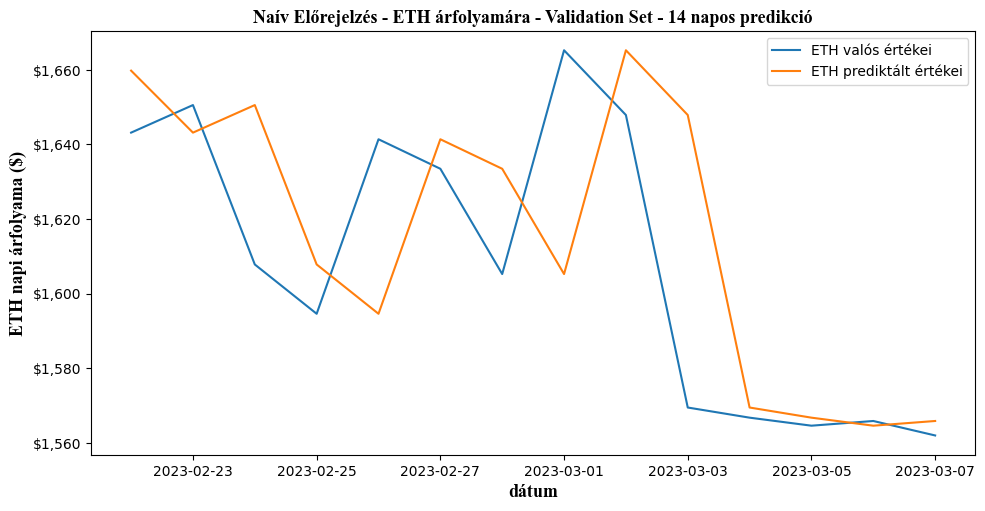

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
print("An example of Naive Prediction")
ax.plot(y_true, label="ETH valós értékei")
ax.plot(y_pred, label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)
plt.tight_layout()
ax.set_title("Naív Előrejelzés - ETH árfolyamára - Validation Set - 14 napos predikció", **font)
plt.savefig("charts/forecast/naive_forecast_example.png")
plt.show()

In [37]:
y_true

date
2023-02-22    1643.14
2023-02-23    1650.53
2023-02-24    1607.80
2023-02-25    1594.58
2023-02-26    1641.36
2023-02-27    1633.45
2023-02-28    1605.23
2023-03-01    1665.22
2023-03-02    1647.86
2023-03-03    1569.45
2023-03-04    1566.73
2023-03-05    1564.58
2023-03-06    1565.84
2023-03-07    1561.96
Name: eth_close, dtype: float64

In [38]:
y_pred

date
2023-02-22    1659.76
2023-02-23    1643.14
2023-02-24    1650.53
2023-02-25    1607.80
2023-02-26    1594.58
2023-02-27    1641.36
2023-02-28    1633.45
2023-03-01    1605.23
2023-03-02    1665.22
2023-03-03    1647.86
2023-03-04    1569.45
2023-03-05    1566.73
2023-03-06    1564.58
2023-03-07    1565.84
Name: prediction, dtype: float64

## Test on Real-World dataset

In [39]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [40]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

## 1 day real world prediction

In [41]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=1)] ## 1 day

In [42]:
eth_current_price = eth_current_price[["Close"]]

In [43]:
eth_current_price["prediction"] = eth_current_price["Close"].shift(1)

In [44]:
y_true = eth_current_price["Close"][1:]
y_pred = eth_current_price["prediction"][1:]

In [45]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
mse = mean_squared_error(y_true, y_pred, squared=True)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)


print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {str(round(mape*100, 3))}%")



RMSE: 95.427490234375
MSE: 9106.405892431736
MAE: 95.427490234375
MAPE: 6.633%


## 3 day real world prediction

In [46]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [47]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [48]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=3)] ## 3 day

In [49]:
eth_current_price = eth_current_price[["Close"]]

In [50]:
eth_current_price["prediction"] = eth_current_price["Close"].shift(1)

In [51]:
y_true = eth_current_price["Close"][1:]
y_pred = eth_current_price["prediction"][1:]

In [52]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
mse = mean_squared_error(y_true, y_pred, squared=True)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)


print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {str(round(mape*100, 3))}%")



RMSE: 63.38909154590548
MSE: 4018.1769270151854
MAE: 52.7962646484375
MAPE: 3.635%


## 7 day real world prediction

In [53]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [54]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [55]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=7)] ## 7 day

In [56]:
eth_current_price = eth_current_price[["Close"]]

In [57]:
eth_current_price["prediction"] = eth_current_price["Close"].shift(1)

In [58]:
y_true = eth_current_price["Close"][1:]
y_pred = eth_current_price["prediction"][1:]

In [59]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
mse = mean_squared_error(y_true, y_pred, squared=True)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)


print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {str(round(mape*100, 3))}%")



RMSE: 70.2338364313615
MSE: 4932.791779867241
MAE: 60.943673270089285
MAPE: 3.893%


## 14 day real world prediction


In [60]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [61]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [62]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=14)] ## 14 day

In [63]:
eth_current_price = eth_current_price[["Close"]]

In [64]:
eth_current_price["prediction"] = eth_current_price["Close"].shift(1)

In [65]:
y_true = eth_current_price["Close"][1:]
y_pred = eth_current_price["prediction"][1:]

In [66]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
mse = mean_squared_error(y_true, y_pred, squared=True)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)


print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {str(round(mape*100, 3))}%")



RMSE: 66.64272843491817
MSE: 4441.25325325025
MAE: 57.742213657924104
MAPE: 3.489%


An example of Naive Prediction


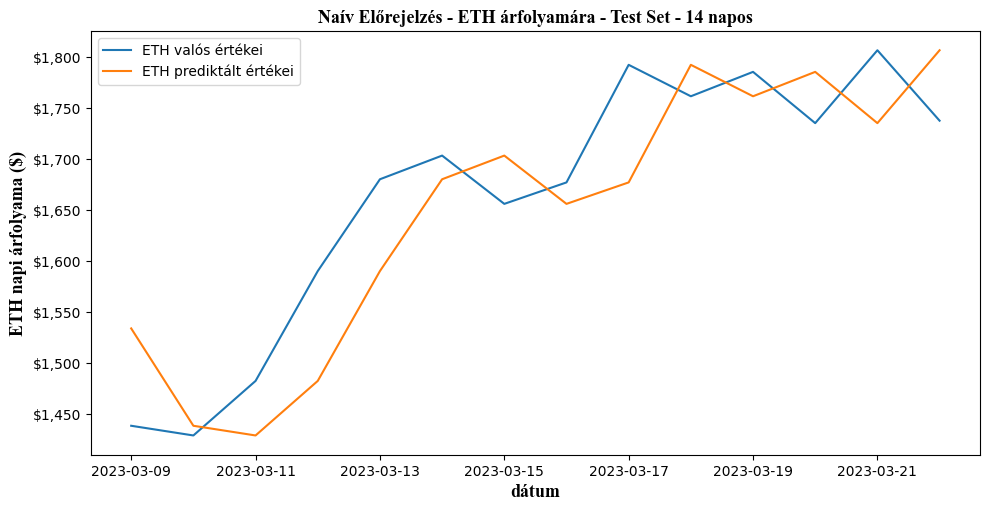

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
print("An example of Naive Prediction")
ax.plot(y_true, label="ETH valós értékei")
ax.plot(y_pred, label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)
plt.tight_layout()
ax.set_title("Naív Előrejelzés - ETH árfolyamára - Test Set - 14 napos", **font)
plt.savefig("charts/forecast/naive_forecast_realword_example.png")
plt.show()